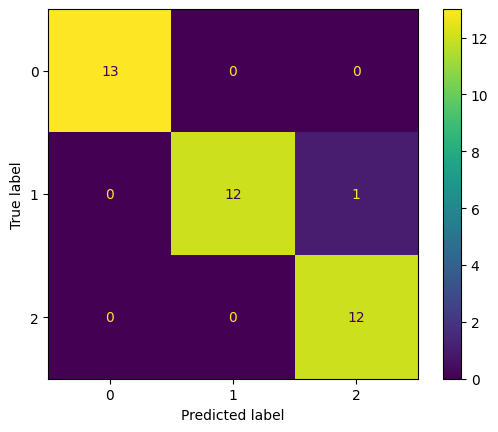

Coefficients:[[ 0.38705175  1.35839989 -2.12059692 -0.95444452]
 [ 0.23787852 -1.36235758  0.5982662  -1.26506299]
 [-1.50915807 -1.29436243  2.14148142  2.29611791]], intercept [ 0.23950369  1.14559506 -1.0941717 ]
Score:0.97


In [33]:
#2a,classification-regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.model_selection import train_test_split   
from sklearn import datasets, linear_model

# 将数据处理为训练集和测试集
def laod_data():
    iris=datasets.load_iris()
    X_train=iris.data
    y_train=iris.target
    return train_test_split(X_train,y_train,
    test_size=0.25,random_state=0,stratify=y_train)#stratify分层


def test_LogisticRegression(*data):
    X_train,X_test,y_train,y_test=data
    regr=linear_model.LogisticRegression(solver='liblinear')
    regr.fit(X_train,y_train)
    
    
    #混淆矩阵
    predictions = regr.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    r = recall_score(y_test,predictions,average='macro')
    disp.plot()
    plt.show()
  

    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print("Score:%.2f"%regr.score(X_test,y_test))
    
if __name__=='__main__':
    X_train,X_test,y_train,y_test=laod_data() 
    test_LogisticRegression(X_train,X_test,y_train,y_test)
    

Test set accuracy:93.33%


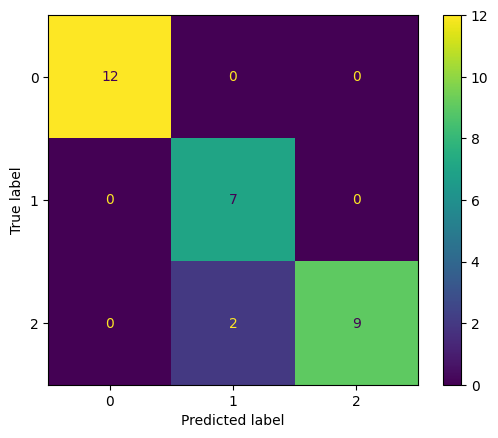

0.9333333333333333


In [227]:
from sklearn.neighbors import KNeighborsClassifier#导入模型类
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics._classification import recall_score
import pandas as pd
import matplotlib.pyplot as plt
#1.捕获鸢尾花数据
iris = datasets.load_iris()
 
#2.提取特征数据
feature = iris['data']
target = iris['target']
 
#3.数据集拆分
x_train,x_test,y_train,y_test =train_test_split(feature,target,test_size = 0.2)


 
#5.实例化模型对象
knn = KNeighborsClassifier(n_neighbors=1,weights='distance')#n_neighbors == k  模型超参数
 
#6.使用训练模型训练模型
#x:训练集特征数据    特征数据要是二维的
#y:训练集的标签数据
knn = knn.fit(x_train,y_train)


#7.测试模型：使用测试数据
#predict 使用训练好的模型实现分类或者预测
y_pre = knn.predict(x_test)

 
#score 评分
print("Test set accuracy:{:.2f}%".format(100*np.mean(y_pre==y_test)))


#混淆矩阵绘制
cm = confusion_matrix(y_test, y_pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
r = recall_score(y_test,y_pre,average='macro')
disp.plot()
plt.show()

# k_value=[1,2,3,4,5,6,7]
# accuracy_value_u=[97,97,97,100,100,100,90]
# accuracy_value_d=[93,100,97,97,100,90,97]

# d=pd.DataFrame({'k_value':k_value})
# d['accuracy_value_uniform']=accuracy_value_u
# d['accuracy_value_distance']=accuracy_value_d


# d.plot(x='k_value', y=['accuracy_value_uniform','accuracy_value_distance'], kind="line")
# plt.show()
print(knn.score(x_test,y_test))

# 选择较小的K值，就相当于用较小的领域中的训练实例进行预测，“学习”近似误差会减小，只有与输入实例较近或相似的训练实例才会对预测结果起作用，与此同时带来的问题是“学习”的估计误差会增大，换句话说，K值的减小就意味着整体模型变得复杂，容易发生过拟合；
# 选择较大的K值，就相当于用较大领域中的训练实例进行预测，其优点是可以减少学习的估计误差，但缺点是学习的近似误差会增大。这时候，与输入实例较远（不相似的）训练实例也会对预测器作用，使预测发生错误，且K值的增大就意味着整体的模型变得简单。